In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

In [2]:
features,target = make_classification(n_samples=10000,n_features=10,n_classes=2, n_informative=4, n_repeated=4,random_state=51)

In [3]:
features.shape

(10000, 10)

In [4]:
target.shape

(10000,)

In [5]:
target

array([1, 0, 0, ..., 0, 0, 1])

In [6]:
Xtrain,Xtest,ytrain,ytest=train_test_split(features, target, random_state=100, test_size=0.2)

# Testing for Logistic Regression

In [7]:
lr=LogisticRegression()

In [8]:
lr.fit(Xtrain,ytrain)

LogisticRegression()

In [9]:
pred = lr.predict(Xtest)
pred

array([0, 0, 1, ..., 0, 0, 1])

In [11]:
cm_pred_proba = lr.predict_proba(Xtest)
cm_pred_proba = cm_pred_proba[:,1]

In [12]:
accuracy_ = accuracy_score(ytest,pred)
accuracy_

0.855

In [13]:
cm = confusion_matrix(ytest,pred)
cm

array([[834, 156],
       [134, 876]], dtype=int64)

In [14]:
fpr_cm, tpr_cm, threshold = roc_curve(ytest,cm_pred_proba)

In [16]:
auc_cm = auc(fpr_cm,tpr_cm)
auc_cm

0.9252335233523353

# Implementing Decision Tree Classifier

In [17]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(Xtrain,ytrain)
dtc_pred_proba = dtc.predict_proba(Xtest)
dtc_pred_proba = dtc_pred_proba[:,1]

fpr_dtc, tpr_dtc,threshold = roc_curve(ytest, dtc_pred_proba)
auc_dtc = auc(fpr_dtc,tpr_dtc)

In [23]:
cm_dtc = confusion_matrix(ytest,dtc.predict(Xtest))
cm_dtc

array([[896,  94],
       [ 83, 927]], dtype=int64)

In [22]:
dtc_accuracy = accuracy_score(ytest, dtc.predict(Xtest))
dtc_accuracy

0.9115

In [18]:
auc_dtc

0.9114361436143614

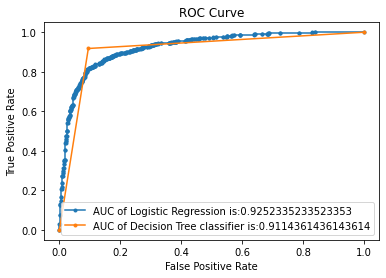

In [21]:
plt.figure(1)
plt.plot(fpr_cm,tpr_cm,marker='.', label='AUC of Logistic Regression is:'+str(auc_cm))
plt.plot(fpr_dtc,tpr_dtc,marker='.', label='AUC of Decision Tree classifier is:'+str(auc_dtc))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()